<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/surrogate_model_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install smt
#!pip install optuna

# surrogate model

![img](https://www.researchgate.net/profile/Yueming_Li2/publication/272412256/figure/fig2/AS:614121384968196@1523429356173/Color-online-Surrogate-model-based-optimization-process.png)

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   


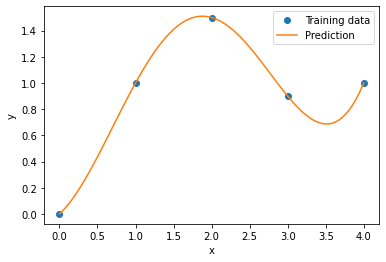

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import RBF

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = RBF(d0=5,print_training=False)
sm.options['print_prediction'] = False
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()

# optimization(minimize)

[I 2020-12-29 14:20:41,877] A new study created in memory with name: no-name-9d65617d-6deb-4bb0-882a-b93206ef6bf6
[I 2020-12-29 14:20:41,880] Trial 0 finished with value: 1.474198008588246 and parameters: {'x1': 2.108767921531581}. Best is trial 0 with value: 1.474198008588246.
[I 2020-12-29 14:20:41,885] Trial 1 finished with value: 0.6844332140076403 and parameters: {'x1': 0.7176608594692842}. Best is trial 1 with value: 0.6844332140076403.
[I 2020-12-29 14:20:41,891] Trial 2 finished with value: 0.2679343191080079 and parameters: {'x1': 0.340696925187038}. Best is trial 2 with value: 0.2679343191080079.
[I 2020-12-29 14:20:41,893] Trial 3 finished with value: 0.8617421750186622 and parameters: {'x1': 3.884184883247469}. Best is trial 2 with value: 0.2679343191080079.
[I 2020-12-29 14:20:41,897] Trial 4 finished with value: 1.2030538353046722 and parameters: {'x1': 2.5981623087194}. Best is trial 2 with value: 0.2679343191080079.
[I 2020-12-29 14:20:41,899] Trial 5 finished with valu

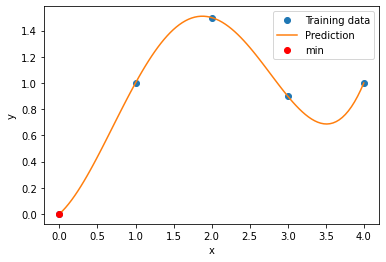

In [3]:
import optuna

def objective(trial: optuna.Trial):
    x1 = trial.suggest_uniform("x1", 0, 4)
    y = sm.predict_values(np.array([x1]))[0][0]
    return y

study = optuna.create_study()
study.optimize(objective, n_trials=250)

# plot
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.plot(study.best_params['x1'],sm.predict_values(np.array([ v for v in study.best_params.values()])),"o",c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction","min"])
plt.show()

# optimization(maximize)

[I 2020-12-29 14:20:43,477] A new study created in memory with name: no-name-92aa2826-285e-4d07-a13e-b51779e1a75b
[I 2020-12-29 14:20:43,481] Trial 0 finished with value: 0.05173100956358212 and parameters: {'x1': 0.08592224434434526}. Best is trial 0 with value: 0.05173100956358212.
[I 2020-12-29 14:20:43,483] Trial 1 finished with value: 0.730589785713164 and parameters: {'x1': 3.7043270539008333}. Best is trial 1 with value: 0.730589785713164.
[I 2020-12-29 14:20:43,485] Trial 2 finished with value: 0.7021917566339653 and parameters: {'x1': 3.387886299168059}. Best is trial 1 with value: 0.730589785713164.
[I 2020-12-29 14:20:43,487] Trial 3 finished with value: 1.5090830893136626 and parameters: {'x1': 1.9185484108094468}. Best is trial 3 with value: 1.5090830893136626.
[I 2020-12-29 14:20:43,489] Trial 4 finished with value: 1.1776846063462472 and parameters: {'x1': 1.1808622023124382}. Best is trial 3 with value: 1.5090830893136626.
[I 2020-12-29 14:20:43,491] Trial 5 finished wi

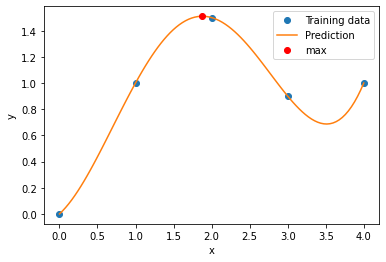

In [4]:
import optuna

def objective(trial: optuna.Trial):
    x1 = trial.suggest_uniform("x1", 0, 4)
    y = sm.predict_values(np.array([x1]))[0][0]
    return y

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

# plot
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.plot(study.best_params['x1'],sm.predict_values(np.array([ v for v in study.best_params.values()])),"o",c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction","max"])
plt.show()

# optimization(Equal)

[I 2020-12-29 14:20:45,046] A new study created in memory with name: no-name-0b86017a-5dad-4f3c-9d32-d09ed1a2e152
[I 2020-12-29 14:20:45,050] Trial 0 finished with value: 0.18857242853499623 and parameters: {'x1': 3.21919327841419}. Best is trial 0 with value: 0.18857242853499623.
[I 2020-12-29 14:20:45,054] Trial 1 finished with value: 0.09620617609633322 and parameters: {'x1': 1.870606161165703}. Best is trial 1 with value: 0.09620617609633322.
[I 2020-12-29 14:20:45,055] Trial 2 finished with value: 0.12296731873986806 and parameters: {'x1': 3.8715559354907776}. Best is trial 1 with value: 0.09620617609633322.
[I 2020-12-29 14:20:45,061] Trial 3 finished with value: 0.0648069481554221 and parameters: {'x1': 1.5976462828160205}. Best is trial 3 with value: 0.0648069481554221.
[I 2020-12-29 14:20:45,062] Trial 4 finished with value: 1.068540164191069 and parameters: {'x1': 0.23252057906009327}. Best is trial 3 with value: 0.0648069481554221.
[I 2020-12-29 14:20:45,064] Trial 5 finishe

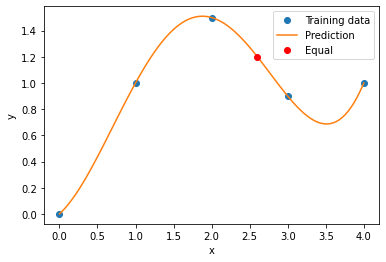

In [5]:
import optuna

set_point = 1.2
def objective(trial: optuna.Trial):
    x1 = trial.suggest_uniform("x1", 0, 4)
    y = sm.predict_values(np.array([x1]))[0][0]
    return (y-set_point)**2

study = optuna.create_study()
study.optimize(objective,n_trials=250)

# plot
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.plot(study.best_params['x1'],sm.predict_values(np.array([ v for v in study.best_params.values()])),"o",c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction","Equal"])
plt.show()